In [4]:
import pandas as pd
import numpy as np

In [5]:
from google.colab import files
uploaded = files.upload()

Saving salary.csv to salary (2).csv


In [6]:
dataset=pd.read_csv('salary.csv')

In [7]:
print(dataset.shape)
print(dataset.head(5))

(32561, 5)
   age  education.num  capital.gain  hours.per.week income
0   90              9             0              40  <=50K
1   82              9             0              18  <=50K
2   66             10             0              40  <=50K
3   54              4             0              40  <=50K
4   41             10             0              40  <=50K


In [8]:

income_set = set(dataset['income'])
dataset['income'] = dataset['income'].map({'<=50K': 0, '>50K': 1}).astype(int)

print(dataset.head)

<bound method NDFrame.head of        age  education.num  capital.gain  hours.per.week  income
0       90              9             0              40       0
1       82              9             0              18       0
2       66             10             0              40       0
3       54              4             0              40       0
4       41             10             0              40       0
...    ...            ...           ...             ...     ...
32556   22             10             0              40       0
32557   27             12             0              38       0
32558   40              9             0              40       1
32559   58              9             0              40       0
32560   22              9             0              20       0

[32561 rows x 5 columns]>


In [9]:
X= dataset.iloc[:, :-1].values
X

array([[90,  9,  0, 40],
       [82,  9,  0, 18],
       [66, 10,  0, 40],
       ...,
       [40,  9,  0, 40],
       [58,  9,  0, 40],
       [22,  9,  0, 20]])

In [10]:
Y= dataset.iloc [:, -1].values
Y

array([0, 0, 0, ..., 1, 0, 0])

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

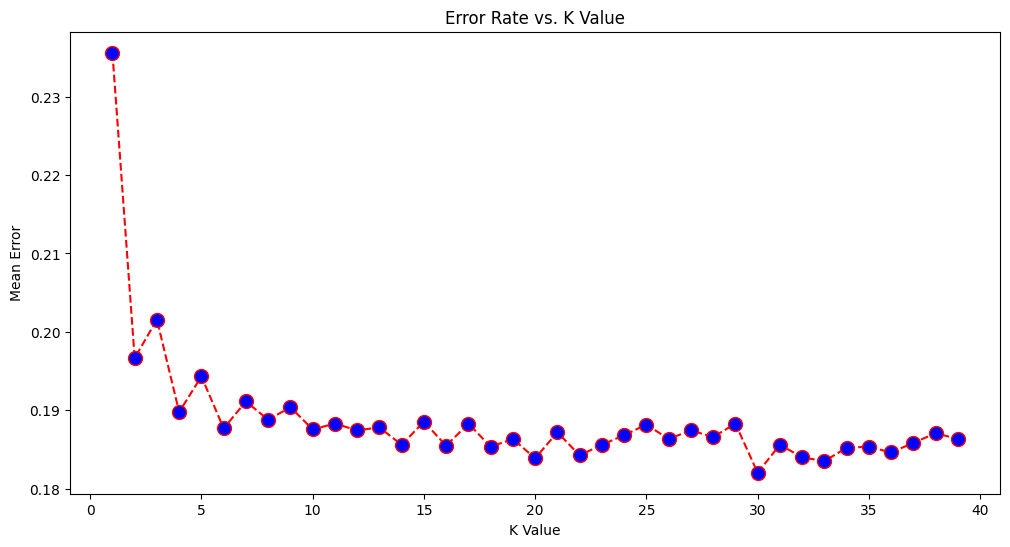

In [13]:
error = []
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train, Y_train)
    pred_i = model.predict(X_test)
    error.append(np.mean(pred_i != Y_test))

# Plot the error rates
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.show()

In [27]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 16, metric = 'minkowski', p = 2)
classifier.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=16)

In [19]:
age = int (input("Enter New Employee's Age: "))
education_num = int (input("Enter New Employee's Education Number: "))
capital_gain = int (input("Enter New Employee's Capital Gain:"))

hours_per_week = int (input("Enter New Employee's Hours Per Week:"))
newEmp = [[age, education_num, capital_gain, hours_per_week]]
result = classifier.predict(sc.transform(newEmp))
print(result)
if result == 1:
  print("Employee makes over 50K")
else:
  print("Employee makes less than 50K")

Enter New Employee's Hours Per Week:9
[0]
Employee makes less than 50K


In [28]:
Y_pred = classifier.predict(X_test)
print(np.concatenate((Y_pred.reshape(len(Y_pred),1), Y_test.reshape(len(Y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [1 0]]


In [29]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test, Y_pred)

print("Confusion Matrix: ")
print(cm)
print ("Accuracy of the Model: {0}%".format(accuracy_score(Y_test, Y_pred)*100))

Confusion Matrix: 
[[5864  329]
 [1181  767]]
Accuracy of the Model: 81.45191008475618%
